<a href="https://colab.research.google.com/github/jamieth0405/MAT421/blob/main/Module_H_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 11 - Jamie Dinh

22.4 Numerical Error and Instability

When solving ODEs numerically, we consider two main properties:

1. Accuracy
- Measures how close the approximation is to the exact solution.
- Depends on step size $h$ and method order $O(h^p)$.

2. Stability
- Describes whether numerical errors grow or stay bounded over time.
- Some methods are **conditionally stable**, only working for certain values of $h$.

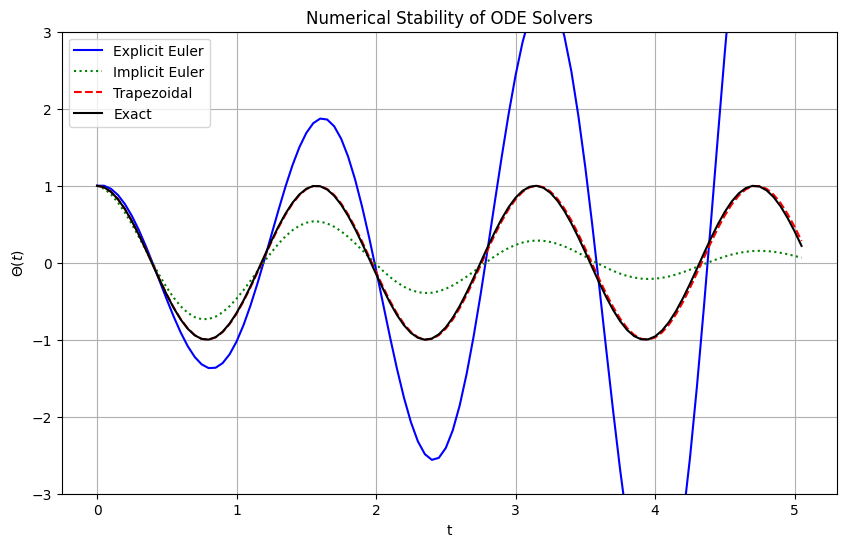

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

h = 0.05
t = np.arange(0, 5.1, h)
w = 4
s0 = np.array([[1], [0]])

# Matrices for each method
m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2, 1]])),
             np.array([[1, h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(len(t)-1):
    s_e[j+1] = np.dot(m_e, s_e[j])
    s_i[j+1] = np.dot(m_i, s_i[j])
    s_t[j+1] = np.dot(m_t, s_t[j])

plt.figure(figsize=(10, 6))
plt.plot(t, s_e[:, 0], 'b-', label='Explicit Euler')
plt.plot(t, s_i[:, 0], 'g:', label='Implicit Euler')
plt.plot(t, s_t[:, 0], 'r--', label='Trapezoidal')
plt.plot(t, np.cos(w*t), 'k', label='Exact')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\\Theta(t)$')
plt.legend()
plt.grid(True)
plt.title('Numerical Stability of ODE Solvers')
plt.show()

This example highlights why stability analysis is critical when choosing a numerical integration method. Smaller h gives a closer approximation to the exact solution.

22.5 Predictor-Corrector Method

This method improves the accuracy of explicit methods by using a two-step process:

1. **Predictor** (Euler-based guess):
$$S\left(t_j + \frac{h}{2}\right) = S(t_j) + \frac{h}{2} F(t_j, S(t_j))$$

2. **Corrector** (refined using midpoint slope):
$$S(t_{j+1}) = S(t_j) + h \cdot F\left(t_j + \frac{h}{2}, S\left(t_j + \frac{h}{2}\right)\right)$$
